In [105]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [107]:
df = sns.load_dataset("healthexp")
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [109]:
df.shape

(274, 4)

In [110]:
df.isnull().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

In [44]:
df.Year

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
269    2020
270    2020
271    2020
272    2020
273    2020
Name: Year, Length: 274, dtype: int64

In [45]:
df.Country

0            Germany
1             France
2      Great Britain
3              Japan
4                USA
           ...      
269          Germany
270           France
271    Great Britain
272            Japan
273              USA
Name: Country, Length: 274, dtype: object

In [46]:
df.Life_Expectancy

0      70.6
1      72.2
2      71.9
3      72.0
4      70.9
       ... 
269    81.1
270    82.3
271    80.4
272    84.7
273    77.0
Name: Life_Expectancy, Length: 274, dtype: float64

In [47]:
df.Spending_USD

0        252.311
1        192.143
2        123.993
3        150.437
4        326.961
         ...    
269     6938.983
270     5468.418
271     5018.700
272     4665.641
273    11859.179
Name: Spending_USD, Length: 274, dtype: float64

In [48]:
df.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


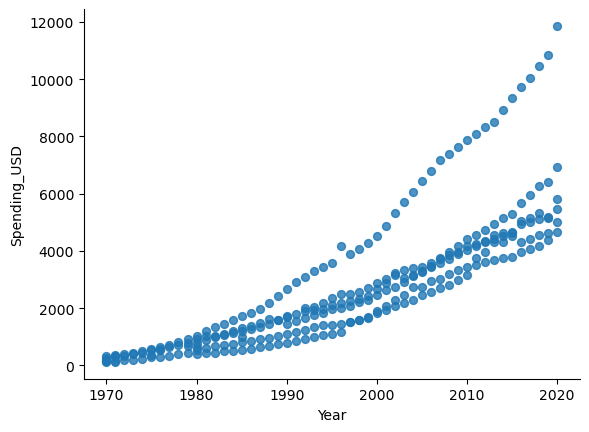

In [124]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Year', y='Spending_USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

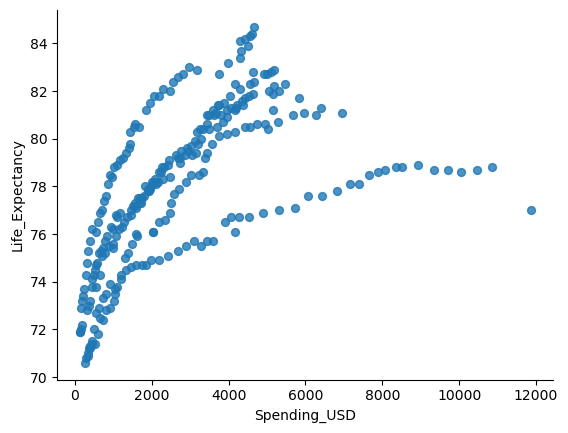

In [137]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Spending_USD', y='Life_Expectancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

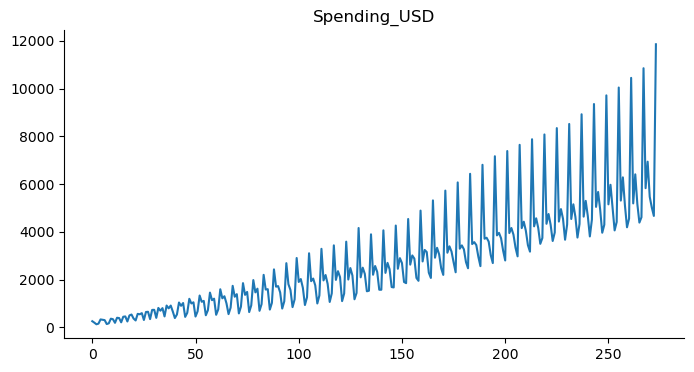

In [113]:
from matplotlib import pyplot as plt
df['Spending_USD'].plot(kind='line', figsize=(8, 4), title='Spending_USD')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

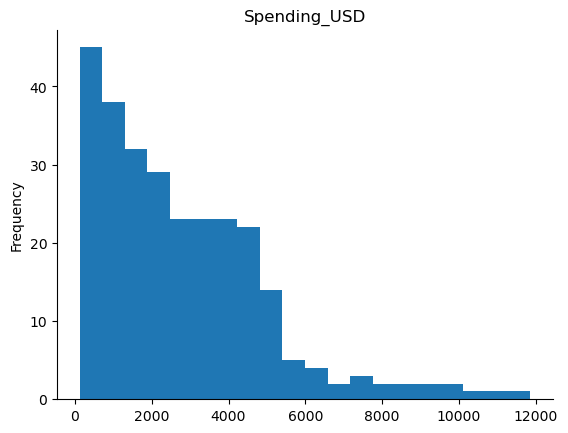

In [114]:
from matplotlib import pyplot as plt
df['Spending_USD'].plot(kind='hist', bins=20, title='Spending_USD')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [115]:
df.Spending_USD.value_counts()

Spending_USD
252.311      1
3264.574     1
3444.855     1
3567.061     1
3486.621     1
            ..
842.797      1
1166.430     1
2901.589     1
1897.456     1
11859.179    1
Name: count, Length: 274, dtype: int64

In [117]:
df.Life_Expectancy.value_counts()

Life_Expectancy
78.8    6
81.0    6
75.7    5
81.2    5
78.6    5
       ..
77.7    1
79.9    1
79.0    1
80.0    1
84.7    1
Name: count, Length: 118, dtype: int64

In [55]:
!pip install ydata-profiling

In [56]:
from ydata_profiling import ProfileReport

In [57]:
Profile = ProfileReport(df, title = "healthexp Report", explorative = True)

In [58]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [59]:
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 28777.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
Profile.to_file("healthexp Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [119]:
country_summary = df.groupby('Country')[['Spending_USD', 'Life_Expectancy']].mean().sort_values('Spending_USD', ascending=False)
print(country_summary)

               Spending_USD  Life_Expectancy
Country                                     
USA             4388.570529        75.843137
France          3045.145057        79.565714
Canada          2685.778341        78.706818
Germany         2667.280200        76.726000
Great Britain   2034.192465        77.620930
Japan           1860.257902        79.554902


/var/folders/r9/c6cjksp1313g4v86v8y03ppw0000gn/T/ipykernel_81099/1376839844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_summary.reset_index(), x='Country', y='Spending_USD', palette='bright')


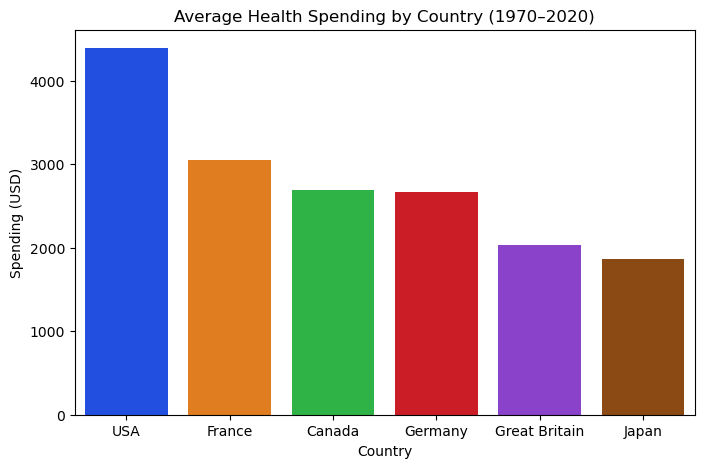

In [121]:
plt.figure(figsize=(8,5))
sns.barplot(data=country_summary.reset_index(), x='Country', y='Spending_USD', palette='bright')
plt.title('Average Health Spending by Country (1970–2020)')
plt.ylabel('Spending (USD)')
plt.show()

/var/folders/r9/c6cjksp1313g4v86v8y03ppw0000gn/T/ipykernel_81099/778442369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_summary.reset_index(), x='Country', y='Life_Expectancy', palette='bright')


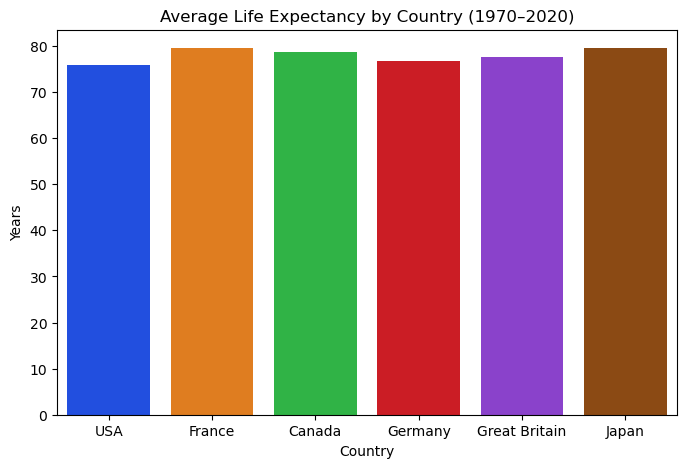

In [123]:
plt.figure(figsize=(8,5))
sns.barplot(data=country_summary.reset_index(), x='Country', y='Life_Expectancy', palette='bright')
plt.title('Average Life Expectancy by Country (1970–2020)')
plt.ylabel('Years')
plt.show()

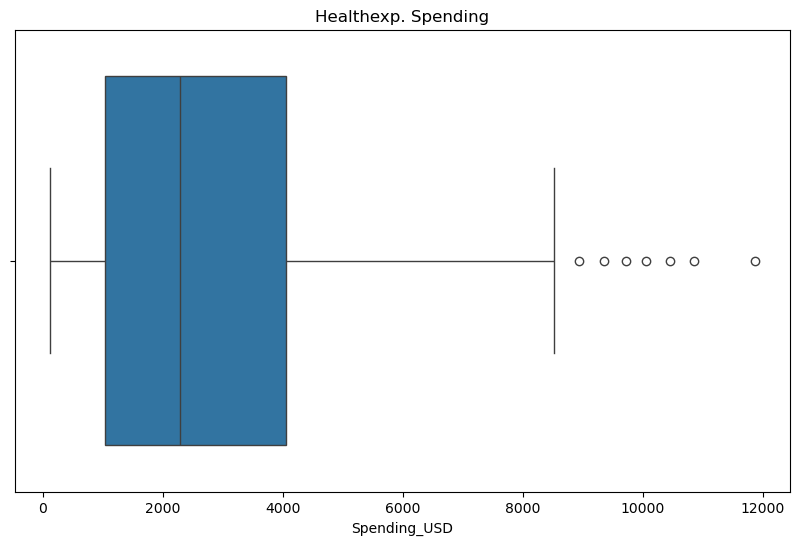

In [61]:
%matplotlib inline
fig = plt.figure(figsize = (10,6))
ax = fig.subplots()

sns.boxplot(x = df["Spending_USD"] , ax = ax)
plt.title("Healthexp. Spending")
plt.xlabel("Spending_USD")
plt.show()

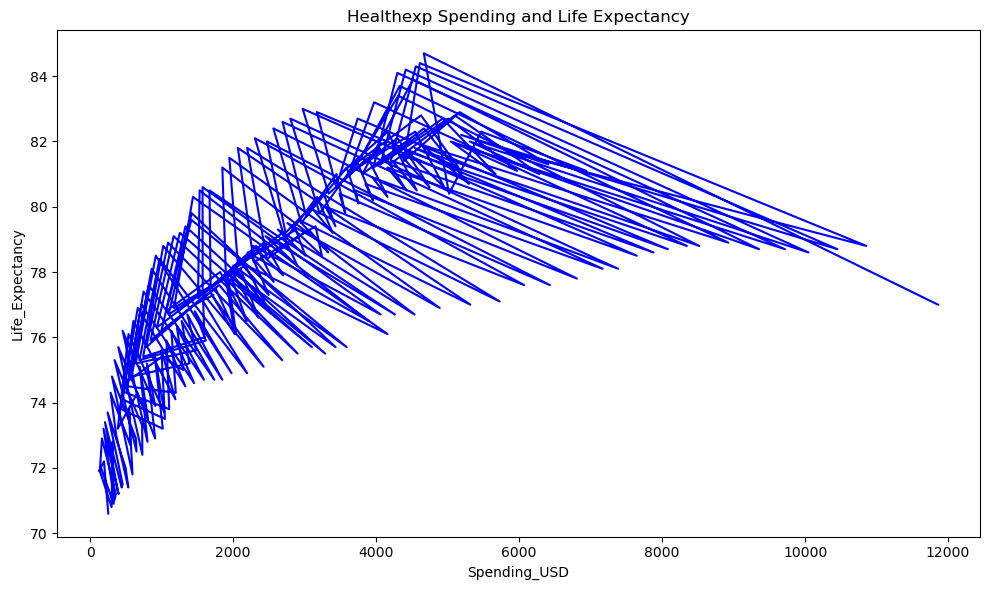

In [62]:
import matplotlib.dates as mdates
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(df['Spending_USD'], df['Life_Expectancy'] , color = 'blue')
ax.set_xlabel('Spending_USD')
ax.set_ylabel('Life_Expectancy')
plt.title('Healthexp Spending and Life Expectancy')
plt.tight_layout()
plt.show()

In [63]:
df1 = df.copy()

In [64]:
df1['Spending_USD'].describe()


count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

In [65]:
q1 = df1['Spending_USD'].quantile(0.25)
q3 = df1['Spending_USD'].quantile(0.75)
IQR = q3 - q1
print(IQR)

3017.253


In [66]:
upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

8581.4895
-3487.5225


In [67]:
len(df1[df1['Spending_USD'] > upper_limit])


7

In [68]:
df1.shape

(274, 4)

In [69]:
df2 = df1[(df['Spending_USD'] > lower_limit) & (df1['Spending_USD'] < upper_limit)]

In [70]:
df2.shape

(267, 4)

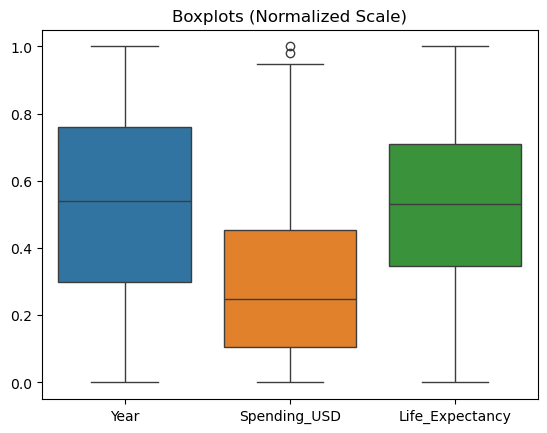

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaled = pd.DataFrame(MinMaxScaler().fit_transform(df2[['Year', 'Spending_USD', 'Life_Expectancy']]),
                      columns=['Year', 'Spending_USD', 'Life_Expectancy'])
sns.boxplot(data=scaled)
plt.title("Boxplots (Normalized Scale)")
plt.show()

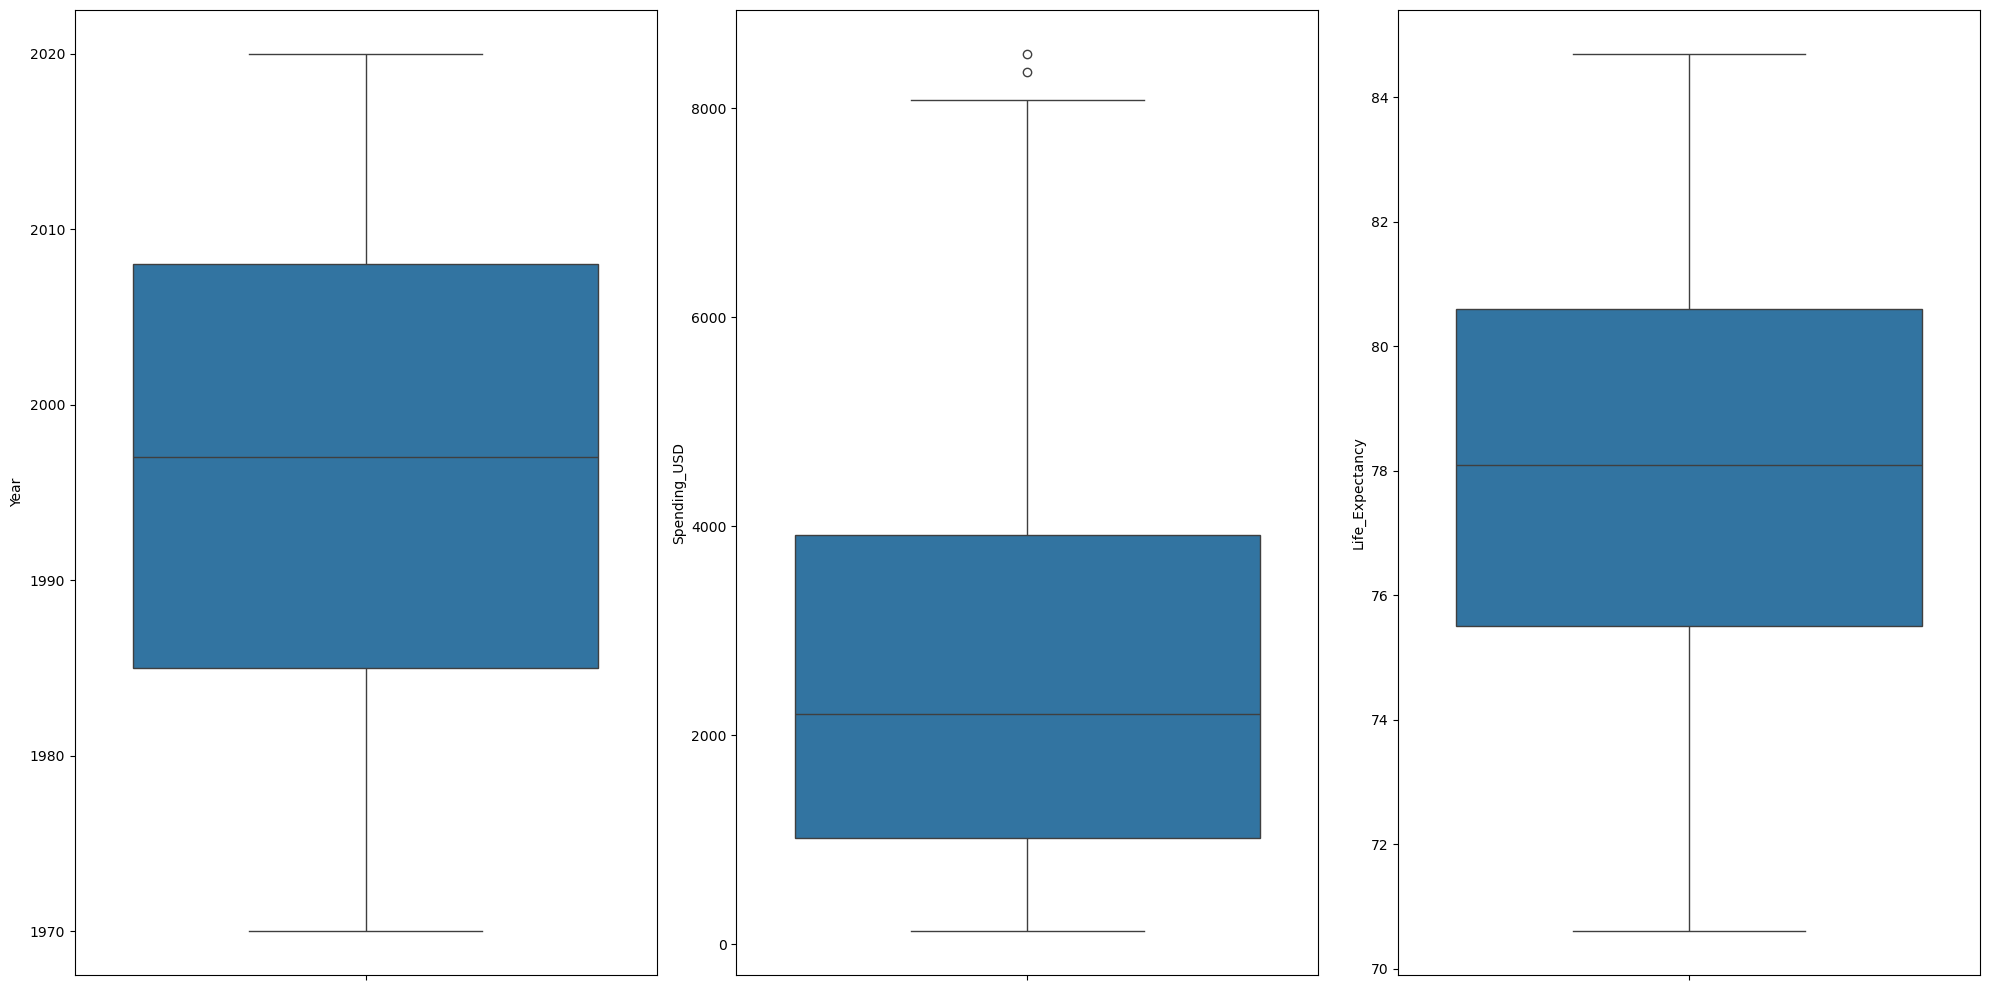

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
sns.boxplot(y='Year', data=df2, ax=axes[0])
sns.boxplot(y='Spending_USD', data=df2, ax=axes[1])
sns.boxplot(y='Life_Expectancy', data=df2, ax=axes[2])
plt.tight_layout()
plt.show()

/var/folders/r9/c6cjksp1313g4v86v8y03ppw0000gn/T/ipykernel_81099/2800859114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Year'].astype(str)


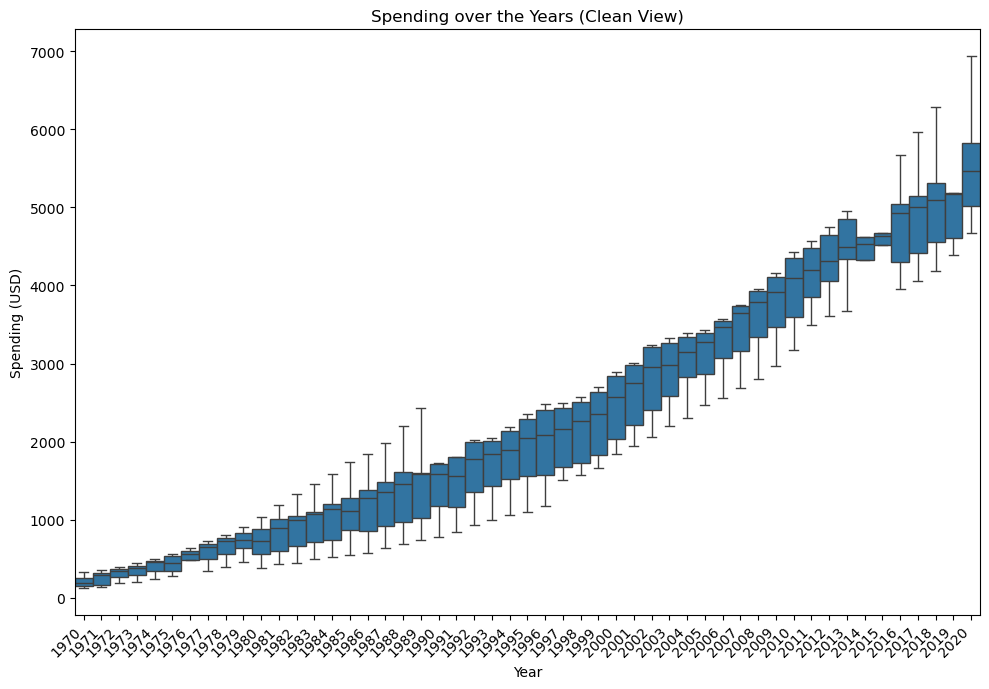

In [73]:
df2['Year'] = df2['Year'].astype(str)
plt.figure(figsize=(10,7))
sns.boxplot(
    data=df2.sort_values('Year'),
    x='Year',
    y='Spending_USD',
    showfliers=False,
    width=1
)
plt.xticks(rotation=45, ha='right')
plt.title('Spending over the Years (Clean View)')
plt.xlabel('Year')
plt.ylabel('Spending (USD)')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

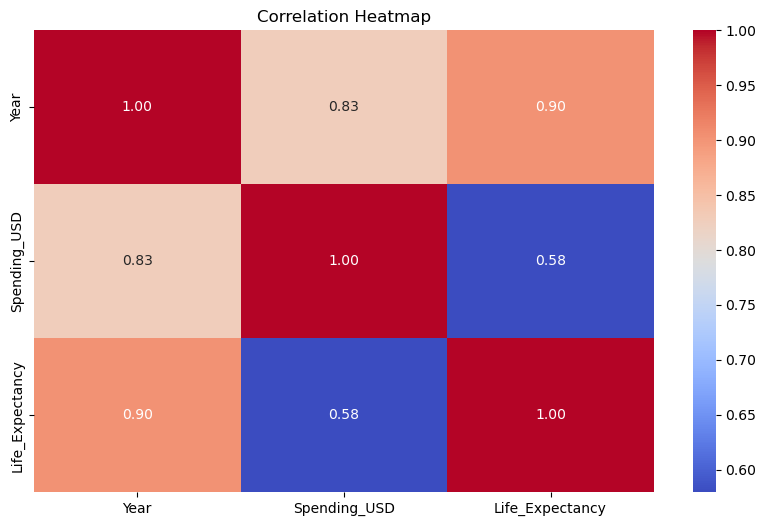

In [75]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [76]:
df2.Spending_USD.value_counts()

Spending_USD
252.311     1
6430.757    1
2469.159    1
2194.437    1
5726.538    1
           ..
2684.984    1
1805.209    1
1558.033    1
842.797     1
4665.641    1
Name: count, Length: 267, dtype: int64

In [77]:
df2.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

In [78]:
X = df2.drop(columns = ['Spending_USD'])

In [79]:
X.columns

Index(['Year', 'Country', 'Life_Expectancy'], dtype='object')

In [118]:
X = pd.get_dummies(X , drop_first = True).astype('int')

In [81]:
X.head()

,Life_Expectancy,Year_1971,Year_1972,Year_1973,Year_1974,Year_1975,Year_1976,Year_1977,Year_1978,Year_1979,...,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
0,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
X.shape

(267, 56)

In [83]:
y = df2[['Life_Expectancy']]
y.columns

Index(['Life_Expectancy'], dtype='object')

In [84]:
y.shape

(267, 1)

In [85]:
%pip install --upgrade cloudpickle

Note: you may need to restart the kernel to use updated packages.


In [86]:
from sklearn.model_selection import train_test_split as split

In [87]:
X_train, X_test , y_train , y_test = split(X, y , train_size = 0.8 , random_state = 42)

In [88]:
X_train.shape


(213, 56)

In [89]:
y_train.shape

(213, 1)

In [90]:
X_test.shape

(54, 56)

In [91]:
y_test.shape

(54, 1)

In [92]:
y.head()

,Life_Expectancy
0,70.6
1,72.2
2,71.9
3,72.0
4,70.9


In [93]:
X.head()

,Life_Expectancy,Year_1971,Year_1972,Year_1973,Year_1974,Year_1975,Year_1976,Year_1977,Year_1978,Year_1979,...,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
0,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,71,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
sc = StandardScaler()

In [96]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [97]:
X_train[:10]

array([[-0.46933953, -0.11952286, -0.09735848, -0.09735848, -0.09735848,
        -0.11952286, -0.11952286, -0.11952286, -0.09735848, -0.11952286,
        -0.17025131, -0.11952286, -0.15504342, -0.15504342, -0.13834289,
        -0.15504342, -0.13834289, -0.13834289, -0.13834289, -0.13834289,
        -0.15504342, -0.13834289, -0.13834289, -0.13834289, -0.11952286,
        -0.11952286,  6.4498062 , -0.17025131, -0.15504342, -0.15504342,
        -0.13834289, -0.15504342, -0.15504342, -0.15504342, -0.15504342,
        -0.13834289, -0.17025131, -0.13834289, -0.15504342, -0.17025131,
        -0.15504342, -0.15504342, -0.13834289, -0.17025131, -0.13834289,
        -0.11952286, -0.15504342, -0.13834289, -0.13834289, -0.11952286,
        -0.15504342, -0.41271015, -0.45098762,  2.3782872 , -0.49559463,
        -0.45098762],
       [ 1.05924333, -0.11952286, -0.09735848, -0.09735848, -0.09735848,
        -0.11952286, -0.11952286, -0.11952286, -0.09735848, -0.11952286,
        -0.17025131, -0.11952

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [99]:
X_train , X_test , y_train , y_test = train_test_split(X , y  , test_size = 0.2 , random_state = 42)

In [100]:
model = make_pipeline(StandardScaler() , Ridge(alpha = 1.0))
model.fit(X_train , y_train)

,steps,"[('standardscaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None


In [101]:
model.score(X_test , y_test)

0.9934279643647871

In [102]:
corr = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", corr)


Correlation Matrix:
                      Year  Spending_USD  Life_Expectancy
Year             1.000000      0.826273         0.902175
Spending_USD     0.826273      1.000000         0.579430
Life_Expectancy  0.902175      0.579430         1.000000


<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

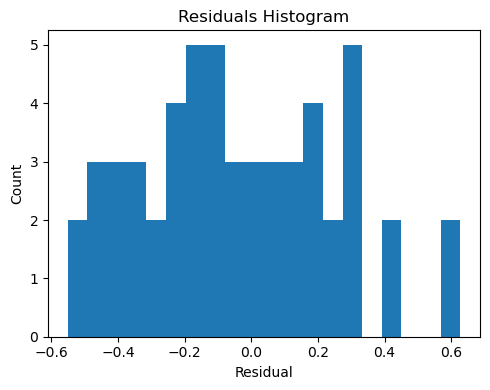

In [132]:

residuals = y_test.values.flatten() - y_pred_best

plt.figure(figsize=(5,4))
plt.hist(residuals, bins=20)
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [134]:

y_pred_best = model.predict(X_test)

comparison = pd.DataFrame({
    "Actual": y_test.values.flatten(),
    "Predicted": y_pred_best
}).reset_index(drop=True)

print("\nFirst 10 — Actual vs Predicted:")
print(comparison.head(10).round(2))


First 10 — Actual vs Predicted:
   Actual  Predicted
0    77.1      77.33
1    76.5      76.34
2    77.6      77.49
3    83.7      83.62
4    77.6      77.61
5    82.1      82.26
6    74.5      74.43
7    81.4      81.51
8    78.1      78.58
9    75.7      75.75
